# Transformers are hardware-driven Architectures

copyright 2023-2024, Denis Rothman

Transformers are hardware and data-driven architectures. This notebooks illustrates the hardware-driven perspective.

This notebook illlustrates the complexity for Self-attention and reccurent layers. The functions are not the actual algorithms of Transformers and RNNs. They simply show how the complexity of the layers varies with a CPU, a GPU, and a TPU. **Run the notebook cell by cell to make sure to choose the right type of processor. If you don't have access to a GPU or a TPU, you can read the notebook.**

Self-attention layers benefit from matrix multiplications whereas reccurent layers are mostly sequential.

The notebook is divided into 3 sections: CPU, GPU, and TPU.

**APRIL 29,2024 code update**: GPUs and TPUs are not always avaialble in the the free version of Google Colab.   
The *GPU* section The code will check if a GPU has been selected if available and give a clear message if not.   
The *TPU information* cell has now been updated. The code will check if the COLAB_TPU_ADDR environment variable is selected if available before trying to use it and give a clear message if it's not.



Reference for complexity: [Attention is All You Need, Vaswani et al.(2017)](https://arxiv.org/abs/1706.03762), page 6:

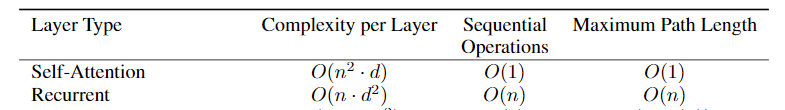





# CPU

In [ ]:
#Computational times of complexity per layer
# Comparing the computational time between:
# self attention = O(n^2 * d)
#and
# recurrent = O(n * d^2)
import numpy as np
import time

# define the sequence length and representation dimensionality
n = 512
d = 512

# define the inputs
input_seq = np.random.rand(n, d)

# simulation of self-attention layer O(n^2*d)
start_time = time.time()
for i in range(n):
    for j in range(n):
        _ = np.dot(input_seq[i], input_seq[j])
at=time.time()-start_time
print(f"Self-attention computation time: {time.time() - start_time} seconds")

# simulation of recurrent layer O(n*d^2)
start_time = time.time()
hidden_state = np.zeros(d)
for i in range(n):
    for j in range(d):
        for k in range(d):
            hidden_state[j] += input_seq[i, j] * hidden_state[k]
rt=time.time()-start_time
print(f"Recurrent layer computation time: {time.time() - start_time} seconds")

# Calculate the total
total = at + rt

# Calculate the percentage of at
percentage_at = round((at / total) * 100,2)

# Output the result
print(f"The percentage of 'computational time for attention' in the sum of 'attention' and 'recurrent' is {percentage_at}%")

# Calculate x, which is the ratio of rt to at
x = round(rt / at,2)

Self-attention computation time: 0.9833767414093018 seconds
Recurrent layer computation time: 118.27663803100586 seconds
The percentage of 'computational time for attention' in the sum of 'attention' and 'recurrent' is 0.82%


## Output
   
Self-attention computation time: 0.7938594818115234 seconds  
Recurrent layer computation time: 109.65185356140137 seconds  
The percentage of 'computational time for attention' in the sum of 'attention' and 'recurrent' is 0.72%

**Note:** the processors may evolve but the concepts remains the same.

# GPU

**April 29,2024 update** GPUs are not always available in Google Colab free plans. Make sure to check if you can activated one before running this code. This code checks to see if a GPU has been selected or not.

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Apr 29 08:42:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   40C    P8              12W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# PyTorch version
import torch
import time

# define the sequence length and representation dimensionality
n = 512
d = 512

# Use GPU if available, otherwise stick with cpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
# define the inputs
input_seq = torch.rand(n, d, device=device)

# simulation of self-attention layer O(n^2*d)
start_time = time.time()
_ = torch.mm(input_seq, input_seq.t())
at = time.time() - start_time
print(f"Self-attention computation time: {at} seconds")

# simulation of recurrent layer O(n*d^2)
start_time = time.time()
hidden_state = torch.zeros(d, device=device)
for i in range(n):
    for j in range(d):
        for k in range(d):
            hidden_state[j] += input_seq[i, j] * hidden_state[k]
            ct = time.time() - start_time
            if ct>at*10:
              break

rt = time.time() - start_time
print(f"Recurrent layer computation time: {rt} seconds")

# Calculate the total
total = at + rt

# Calculate the percentage of at
percentage_at = round((at / total) * 100, 2)

# Output the result
print(f"The percentage of self-attention computation in the sum of self-attention and recurrent computation is {percentage_at}%")

cuda
Self-attention computation time: 0.12056708335876465 seconds
Recurrent layer computation time: 9.53637957572937 seconds
The percentage of self-attention computation in the sum of self-attention and recurrent computation is 1.25%


## Output    
cuda
Self-attention computation time: 2.887202501296997 seconds
Recurrent layer computation time: 36.3216814994812 seconds
The percentage of self-attention computation in the sum of self-attention and recurrent computation is 7.36%

**Note:**: the processors may evolve but the concepts remains the same.

In [ ]:
!nvidia-smi

Mon Apr 29 08:11:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0              30W /  70W |    153MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Output for processor information

**Note:**: the processors may evolve but the concepts remains the same

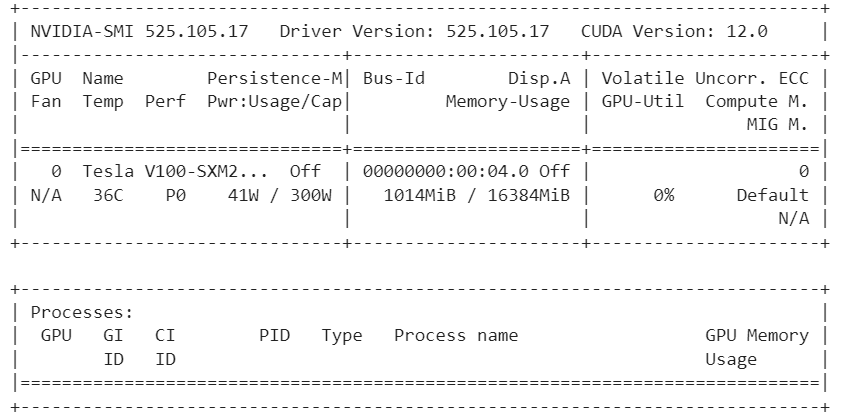

# TPU

## TPU information

**April 29, 2024 update**
Restart the runtime before running this cell after selecting a TPU in the Runtime->Change Runtime type menu before running the following cells.


In [1]:
import tensorflow as tf

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # Tries to detect a TPU
    print('Running on TPU:', tpu.master())
except ValueError:
    print("Could not connect to TPU")
    tpu = None

if tpu:
    print("TPU found")
else:
    print("No TPU found")

Running on TPU: 
TPU found


In [2]:
import tensorflow as tf
import numpy as np
import time

# define the sequence length and representation dimensionality
n = 512
d = 512

# define the inputs
input_seq = tf.random.normal((n, d), dtype=tf.float32)

# simulation of self-attention layer O(n^2*d)
start_time = time.time()
_ = tf.matmul(input_seq, input_seq, transpose_b=True)
at = time.time() - start_time
print(f"Self-attention computation time: {at} seconds")

# simulation of recurrent layer O(n*d^2)
start_time = time.time()
hidden_state = np.zeros((n, d), dtype=np.float32)
for i in range(n):
    for j in range(d):
        for k in range(d):
            hidden_state[i, j] += input_seq[i, j].numpy() * hidden_state[min(i,k), j]
            ct = time.time() - start_time
            if ct>at*10:
              break

rt = time.time() - start_time
print(f"Recurrent layer computation time: {rt} seconds")

# Calculate the total
total = at + rt

# Calculate the percentage of at
percentage_at = round((at / total) * 100, 2)

# Output the result
print(f"The percentage of self-attention computation in the sum of self-attention and recurrent computation is {percentage_at}%")

Self-attention computation time: 0.04091024398803711 seconds
Recurrent layer computation time: 55.98019599914551 seconds
The percentage of self-attention computation in the sum of self-attention and recurrent computation is 0.07%


## Output
Self-attention computation time: 0.10626077651977539 seconds  
Recurrent layer computation time: 66.53181290626526 seconds  
The percentage of self-attention computation in the sum of self-attention and recurrent computation is 0.16%'  
**Note:**
 The processors may evolve but the concepts remains the same.

## LLM configuration

In [3]:
import tensorflow as tf
import numpy as np
import time

# define the sequence length and representation dimensionality
n =  32768
d = 12288

# define the inputs
input_seq = tf.random.normal((n, d), dtype=tf.float32)

# simulation of self-attention layer O(n^2*d)
start_time = time.time()
_ = tf.matmul(input_seq, input_seq, transpose_b=True)

at = time.time() - start_time
print(f"Self-attention computation time: {at} seconds")

Self-attention computation time: 7.127515554428101 seconds


### Output LLM configuration

Self-attention computation time: 23.391557216644287 seconds

**Note:**   
The processors may evolve but the concepts remains the same.